# Phase 2 Milestone 1 


## 1 - Introduction

1. Nama    : Imam Ahfas
2. Batch   : FTDS-012
3. Dataset : Telco-Customer-Churn |


### Description

### Objective

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

1. Mampu memahami konsep Artificial Neural Network.
2. Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
3. Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
4. Mampu menganalisis dan menjelaskan layer yang dibuat.

### Problem Statement

Membuat model klasifikasi untuk memprediksi Telco-Customer_Churn menggunakan dataset yang sudah ada.


## Working Area

## 2 - Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pickle, os


## 3 - Data Loading

> Bagian ini berisikan proses penyiapan data dengan memasukan dataset Telco-Customer Churn yang berformat csv

In [2]:
# Memasukan data 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col="customerID")

> Menjadikan customer ID sebagai kolom index karena merupakan unique ID dari setiap customer atau transaksi

In [3]:
# Melihat dataset 2 teratas
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
# Melihat dataset 2 terbawah
df.tail(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Informasi Dataset
|Column Name|Description|
|-|-|
|**customerID**|A unique ID that identifies each customer|
|||
|**gender**|The customer’s gender: Male, Female|
|||
|**SeniorCitizen**|Indicates if the customer is 65 or older: Yes, No|
|||
|**Partner**|whether customer has partner: Yes, No|
|||
|**Dependents**|Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.|
|||
|**tenure**|Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above|
|||
|**PhoneService**|Indicates if the customer subscribes to home phone service with the company: Yes, No|
|||
|**MultipleLines**|Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No|
|||
|**InternetService**|Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.|
|||
|**OnlineSecurity**|Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No|
|||
|**OnlineBackup**| Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No|
|||
|**DeviceProtection**|Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No|
|||
|**TechSupport**|Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No|
|||
|**StreamingTV**|Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.|
|||
|**StreamingMovies**|Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.|
|||
|**Contract**|Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.|
|||
|**PaperlessBilling**|Indicates if the customer has chosen paperless billing: Yes, No|
|||
|**PaymentMethod**|Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check|
|||
|**MonthlyCharges**|Indicates the customer’s current total monthly charge for all their services from the company.|
|||
|**TotalCharges**|Indicates the customer’s total charges, calculated to the end of the quarter specified above.|
|||
|**Churn**|Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.|
|||

In [5]:
# Transform data untuk memudahkan membaca dan menganalisa kolom dari data
df.head(2).T

customerID,7590-VHVEG,5575-GNVDE
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes
OnlineBackup,Yes,No


> Terlihat bahwa ada empat feature yang memiliki nilai numerik yaitu, SeniorCitizen, tenure, MonthlyCharges, TotalCharges

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

> Terlihat bahwa dari empat data numerik sebelumnya terdapat TotalCharges yang memiliki tipe data object, seharusnya tipe data pada feature tersebut adalah float yang mana sama dengan MonthlyCharges, selanjutnya tipe data akan dirubah menjadi float dengan error coerce dimana anomali data akan menjadi NaN

In [7]:
# Merubah tipe data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [8]:
# Melihat tipe data setalah 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

> Setelah dilakukan perubahan data, terlihat adanya missing values

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> Terlihat terdapat 11 missing value pada TotalCharges, kita lihat lebih dalam

In [10]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


> Terlihat bahwa NaN data tersebut berkolerasi dengan tenure yang nilainya adalah 0, dapat kita asumsikan bahwa customer merupakan pengguna baru, sehingga NaN akan kita rubah dan input dengan nilai 0

In [11]:
# Memasukan dengan nilai 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Terlihat bahwa sudah tidak ada missing value

## 4 - Exploratory Data Analysis (EDA)

### EDA 1

> 1. EDA pertama yang menarik dan bisa kita lihat adalah hubungan Churn dengan TotalCharges

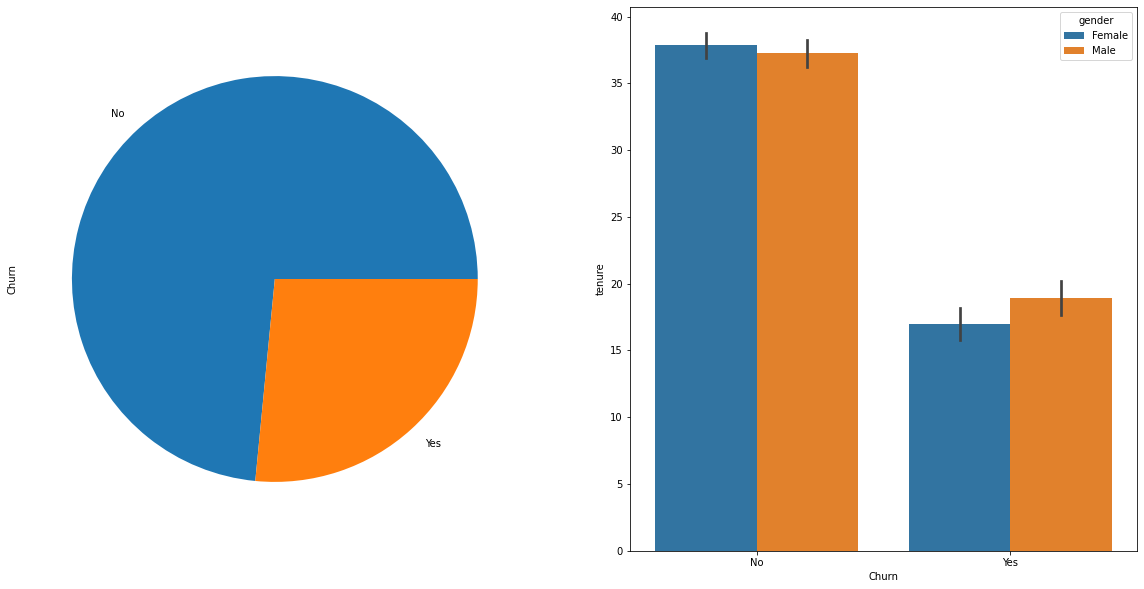

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
df['Churn'].value_counts().plot(y="Churn", kind="pie")
plt.subplot(1, 2, 2)
sns.barplot(x='Churn', y='tenure', hue='gender', data=df)
plt.show()

In [14]:
(df[df['Churn']=='Yes']['Churn'].count()/df[df['Churn']=='No']['Churn'].count())*100

36.122922303826826

In [15]:
(df[df['Churn']=='Yes']['Churn'].count()/df[df['Churn']=='No']['Churn'].count())*100

36.122922303826826

> Terlihat dimana presentasi dari pelanggan yang churn sekitar 36%, sedangkan hubungan dengan tenur terlihat bahwa pelanggan yang churn memiliki tenur kurang dari 20 bulan yang artinya masih tergolong pelanggan baru dan kebanyakan merupakan pria

### EDA 2

> 2. EDA kedua yang menarik adalah melihat hubungan antara churn dengan monthly charges dan total charges

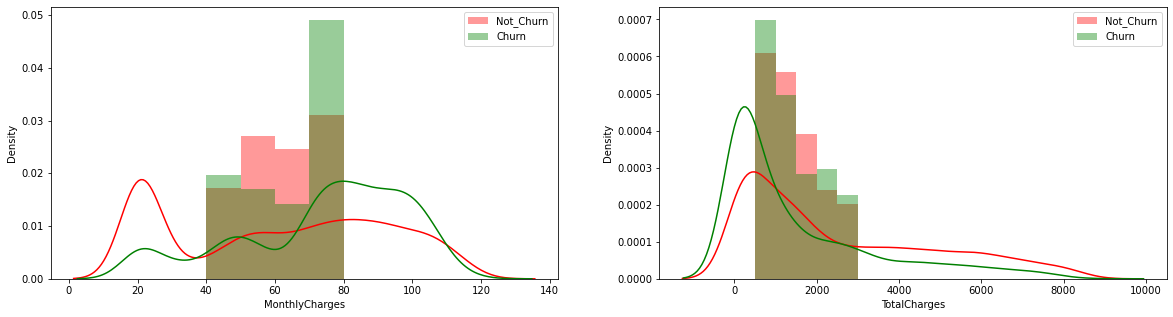

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(df.MonthlyCharges[df.Churn=='No'], bins=(40, 50, 60, 70, 80), color="r", label="Not_Churn")
sns.distplot(df.MonthlyCharges[df.Churn=='Yes'], bins=(40, 50, 60, 70, 80), color="g", label="Churn")
plt.legend()
plt.subplot(1, 2, 2)
sns.distplot(df.TotalCharges[df.Churn=='No'], bins=(500, 1000, 1500, 2000, 2500, 3000), color="r", label="Not_Churn")
sns.distplot(df.TotalCharges[df.Churn=='Yes'], bins=(500, 1000, 1500, 2000, 2500, 3000), color="g", label="Churn")
plt.legend()

> Pada chart pertama terlihat bahwa pelanggan yang churn, memiliki MonthlyCharges atau biaya bulanan diatas 60 sampai dengan 110, dan pada chart kedua terlihat bahwa pelanggan yang churn membayar lebih mahal dibandingkan pelanggan yang tidak churn, mungkin pelanggan merupakan pelanggan yang baru dan mendapatkan harga yang yang lebih mahal dibandingkan pelanggan lama dan tidak mendapatkan harga promo

### EDA 3

> 3. EDA ketiga yang menarik adalah melihat hubungan antara churn dengan gender, partner, dependens, phone service, paperlessbilling dan senior citizen

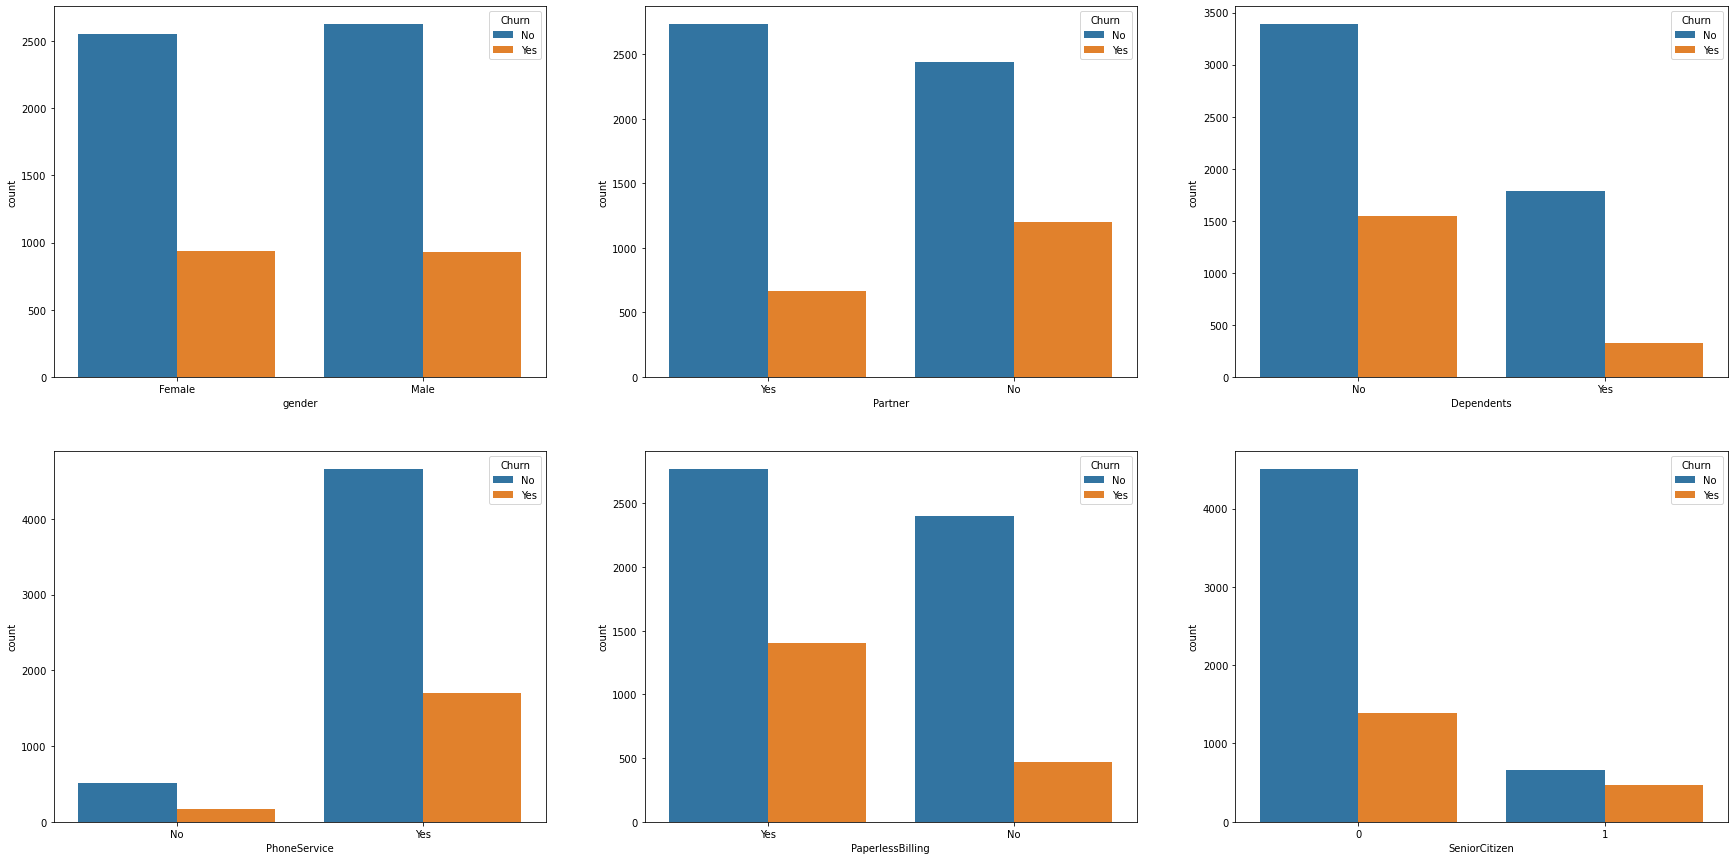

In [17]:
# Barplot hubungan antara Churn dengan fitur lainnya
cat_var = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']
fig, axes = plt.subplots(2, 3, figsize=(30, 15))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Churn", ax=ax)

> Pada chart hubungan Churn dengan gender, tidak terlihat adanya perbedaan yang signifikan

> Pada chart hubungan Churn dengan Partner, tidak terlihat adanya perbedaan signifikan pada pelanggan yang tidak churn baik memiliki partner dan tidak, namun untuk pelanggan yang churn ada perbedaan walaupun kecil

> Pada chart hubungan Churn dengan Dependen, terdapat perbedaan dimana pelanggan yang tidak tinggal dengan dependen baik itu keluarga ataupun anak lebih lebih besar kemungkinannya untuk tidak churn atau lanjut dalam berlangganan

> Pada chart hubungan Churn dengan Phoneservice, terlihat perbedaan dimana pelanggan yang berlangganan phoneservice lebih banyak, namun juga lebih banyak yang churn

> Pada chart hubungan Churn dengan Paperlessbilling, terlihat sedikit perbedaan dimana pelanggan yang menggunakan paperlessbilling lebih banyak namun juga lebih banyak kemungkinan untuk churnnya

> Pada chart hubungan Churn dengan SeniorCitizen, terlihat, perbedaan cukup siginifikan dimana jumlah pelanggan yang belum memiliki umur 65 lebih banyak dan yang senior atau memiliki umur 65 ke atas sedikit namun kemungkinannya untuk churn lebih besar, mungkin karena penggunaan layananya dibatasi karena sudah lebih tua

### EDA 4

> 4. EDA keempat yang menarik adalah melihat hubungan antara churn dengan fitur yang memiliki nilai atau value lebih dari dua

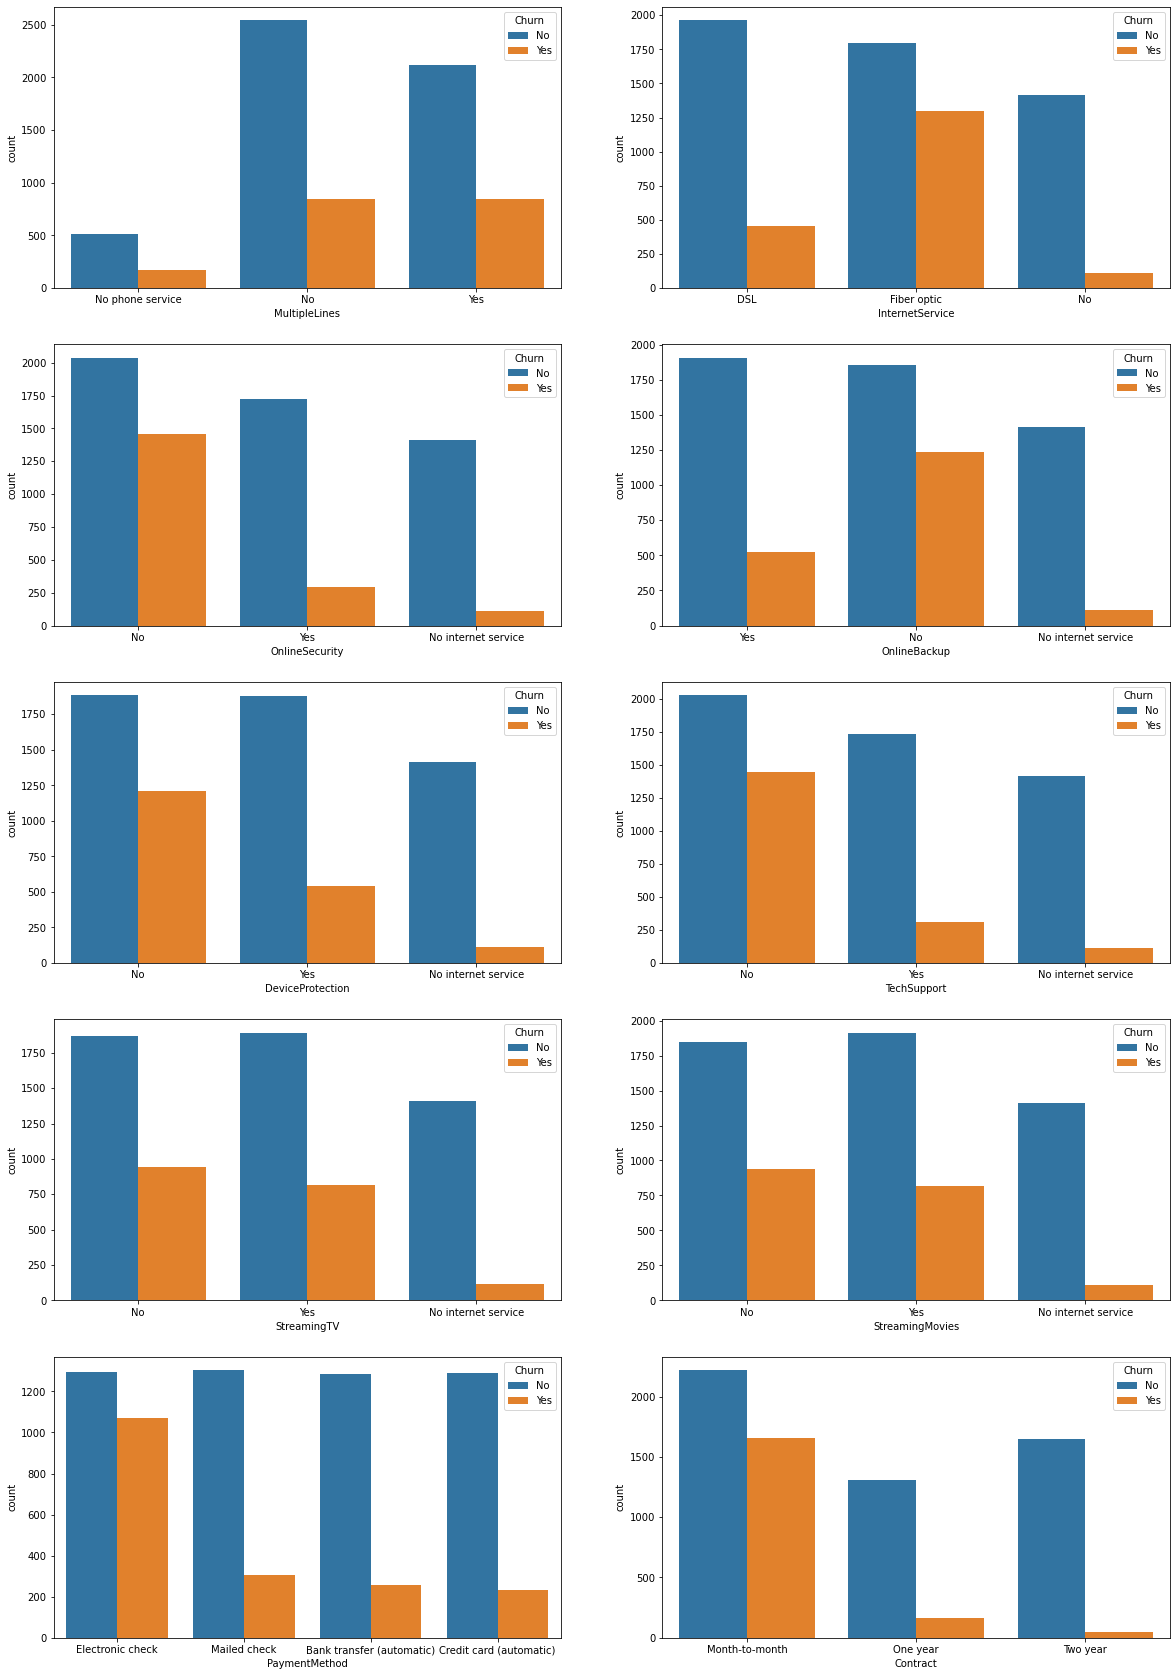

In [18]:
# Barplot hubungan antara Churn dan fitur lainnya
cat_var = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'Contract']
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Churn", ax=ax)

> Pada chart hubungan Churn dengan Multiplelines, terlihat adanya perbedaan untuk pelanggan yang tidak churn, lebih banyak pelanggan tidak menggunakan layanan  Multiplelines dan paling sedikit pelanggan yang tidak menggunakan layanan phoneservice

> Pada chart hubungan Churn dengan Internetservice, ada perbedaan yang signifikan dimana pelannggan yang churn lebih banyak memiliki layanan fiberoptic

> Pada chart hubungan Churn dengan Onlinsecurity, terlihat adanya perbedaan cukup signifikan pada pelanggan yang churn baik tidak memiliki layanan Onlinsecurity, memiliki dan tidak meiliki internet service

> Pada chart hubungan Churn dengan Online backup, terlihat adanya perbedaan cukup signifikan pada pelanggan yang churn dan tidak memiliki layanan online backup, memiliki dan tidak memiliki layanan internet service

> Pada chart hubungan Churn dengan Device Protection, terlihat adanya perbedaan cukup signifikan pada pelanggan yang churn dan tidak memiliki layanan Device Protection, memiliki dan tidak memiliki layanan internet service

> Pada chart hubungan Churn dengan Techsupport, terlihat adanya perbedaan cukup signifikan pada pelanggan yang churn dan tidak memiliki layanan Techsupport, memiliki dan tidak memiliki layanan internet service

> Pada chart hubungan Churn dengan StreamingTV, terlihat adanya sedikit perbedaan pada pelanggan yang churn dan tidak memiliki layanan StreamingTV dengan memiliki, adan cukup signifikan pada pelanggan yang tidak memiliki layanan internet service

> Pada chart hubungan Churn dengan Paymentmethod, perbedaan cukup signifikan hanya terdapat pada pelanggan yang mungkin churn dan menggunakan payment method Electronic check, dimana paling paling banyak dibandingan dengan pelanggan yang menggunakan payment mailed check, bank transfer dan credit card

> Pada chart hubungan Churn dengan Contract, terlihat adanya perbedaan cukup signifikan pada pelanggan yang churn dengan menggunakan contract month-to-month, dimana paling banyak dibandingkan dengan pelanggan yang menggunakan contract one year dan two year

### EDA 5

> 5. EDA selanjutnya adalah melihat hubungan diantara tiap fitur atau kolom satu sama lain dengan menggunakan heatmap

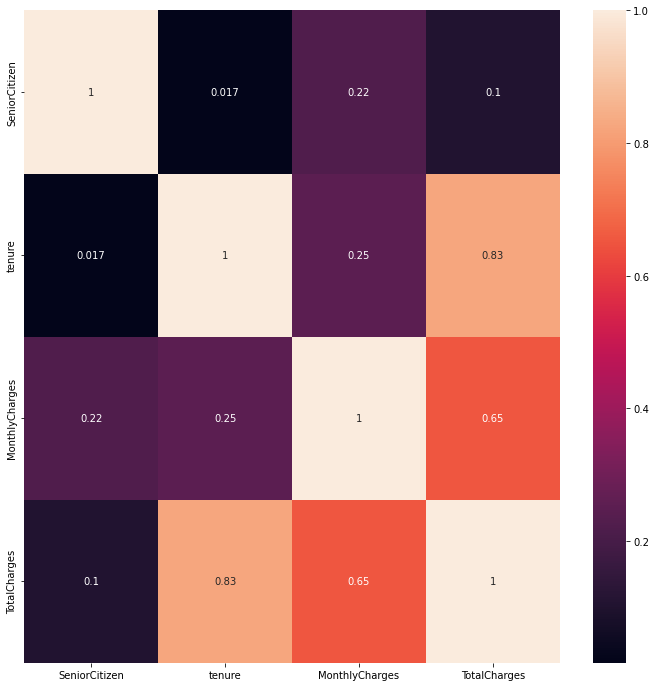

In [19]:
# Melihat hubungan antara tiap fitur menggunakan heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

> Terlihat bahwa yang memiliki nilai korelasi atau hubungan paling besar adalah Total Charge dengan MonthlyCharges dan Tenure, sedangkan pada SeniorCitizen nilainya paling kecil atau hubungannya tidak begitu besar

## 5 - Data Preprocessing

### Get Data for Model Inference

In [20]:
# Membuat data untuk model inference
df_inf = df.sample(10, random_state=42)
df_inf.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No


In [21]:
# Remove Inference-Set from Dataset
df_train_test =df.drop(df_inf.index)
df_train_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [22]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
1,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No


### Splitting Dataset

> Bagian adalah merupakan pemisahan dataset menjadi dua variabel yaitu variabel X untuk fitur dan y untuk target

In [23]:
# Split between `X` (Features) and `y` (Target)

X = df_train_test.drop('Churn', axis=1)
y = df_train_test['Churn']
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [24]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5626, 19)
Test Size :  (1407, 19)


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Validation Size: ', X_val.shape)

Validation Size:  (1126, 19)


### Feature Selection

> Bagian ini adalah bagian dimana menentukan fitur dari dataset yang nantinya akan menjadi data yang akan di training dan di test, Seleksi Fitur dilakukan agar model yang digunakan memiliki kehandalan yang tinggi 

In [26]:
# Display X_train

X_train.head(2).T

,6382,5518
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,Yes
Dependents,Yes,No
tenure,60,44
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes
OnlineBackup,Yes,Yes


In [27]:
# Melihat unique value dari dataset

for i in df.columns:
    print(i, 'unique: ', df[i].unique(),'\n')

gender unique:  ['Female' 'Male'] 

SeniorCitizen unique:  [0 1] 

Partner unique:  ['Yes' 'No'] 

Dependents unique:  ['No' 'Yes'] 

tenure unique:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService unique:  ['No' 'Yes'] 

MultipleLines unique:  ['No phone service' 'No' 'Yes'] 

InternetService unique:  ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity unique:  ['No' 'Yes' 'No internet service'] 

OnlineBackup unique:  ['Yes' 'No' 'No internet service'] 

DeviceProtection unique:  ['No' 'Yes' 'No internet service'] 

TechSupport unique:  ['No' 'Yes' 'No internet service'] 

StreamingTV unique:  ['No' 'Yes' 'No internet service'] 

StreamingMovies unique:  ['No' 'Yes' 'No internet service'] 

Contract unique:  ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling unique:  ['Yes' 'No'] 

PaymentMethod

In [28]:
# Melihat isi kolom dari X_train
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

> Berdasarkan personal judgement, yang memiliki kaitan dengan `Churn` adalah,
- `SeniorCitizen` dimana adanya hubungan pelanggan yang belum dan memiliki umur 65 atau lebih dengan churn
-  `Dependents` dimana adanya hubungan pelanggan yang sudah memiliki keluarga atau anak dengan penggunaan layanan Telco
- `tenur` dimana tenor atau lamanya pelanggan yang sudah menggunakan layanan dalam jumlah bulan
- `PhoneService` dimana pelanggan yang menggunakan layanan phoneservice
- `MultipleLines` dimana pelanggan yang menggunakan layanan multiple line phoneservice 
- `InternetService` dimana pelanggan yang menggunakan layanan internet service
- `OnlineSecurity` dimana pelanggan yang menggunakan layanan online security
- `OnlineBackup` dimana pelanggan yang menggunakan layanan online backup untuk keamanan datanya 
- `TechSupport` dimana pelanggan yang menggunakan layanan tech support untuk mengurangi waktu tunggu ketika terjadi masalah saat ada trouble dengan layanannya
- `StreamingMovies` dimana pelanggan yang menggunakan layanan StreamingMovies 
- `Contract` dimana adanya hubungan antara pelanggan yang menggunakan contract layanan satu dan lainnya dengan churn
- `PaperlessBilling` dimana adanya hubungan pelanggan yang menggunakan paperlessBilling dan tidak
- `MonthlyCharges` dimana terlihat pada heatmap atau correlation matrix sebelumnya memiliki hubungan yang cukup besar dengan Totalcharges dan merupakan jumlah charge setiap bulannya dari service yang digunakan pelanggan
- `TotalCharges` dimana terlihat pada heatmap atau correlation matrix sebelumnya memiliki hubungan yang cukup besar dengan monthlycharge dan tenur, dan merupakan jumlah charge yang dibayarkan dalam setiap quarternya

In [29]:
# Melakukan pemilihan fitur guna melakukan train dan test yang mendapatkan hasil yang handal
X_train = X_train[[ 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling','MonthlyCharges', 'TotalCharges']]
X_test = X_test[[ 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling','MonthlyCharges', 'TotalCharges']] 

### Handling Outlier

> Bagian adalah bagian dimana melihat apakah terdapat Oulier yang perlu dihandling atau tidak

In [30]:
# Membuat numerik variabel untuk memudahkan analisa
X_train_num =  X_train[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

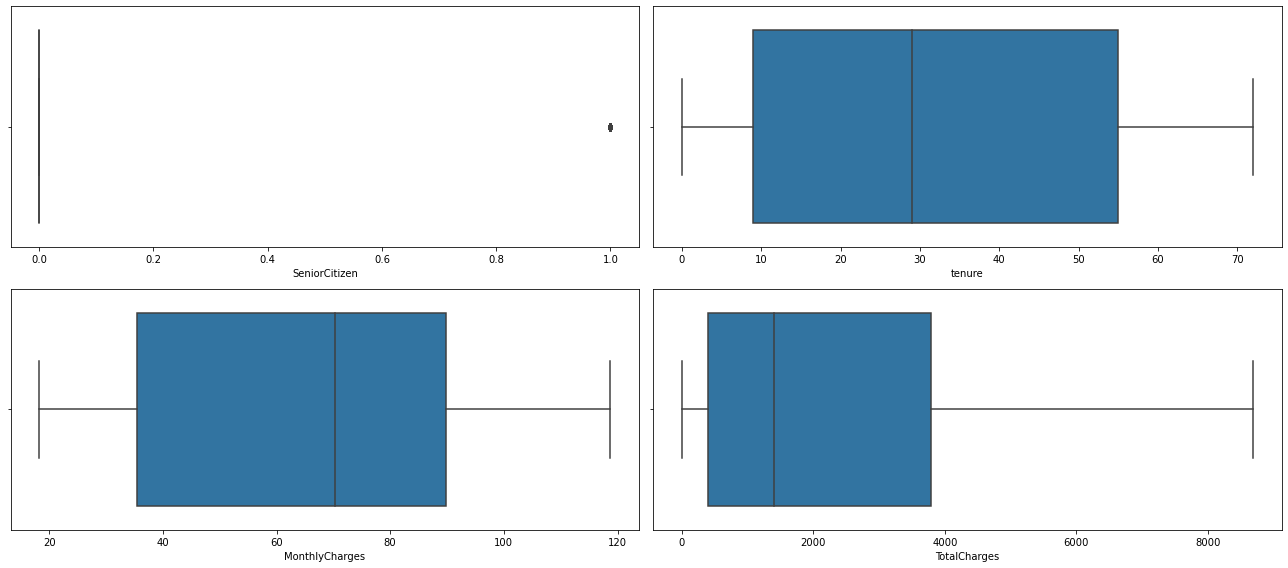

In [31]:
# Melihat outlier dengan visualisasi Box Plot 

x = plt.figure(figsize=(18, 8))
for i, j in enumerate(X_train_num):
    x.add_subplot(2, 2, i+1)
    sns.boxplot(df[j])
    x.tight_layout()
plt.tight_layout()

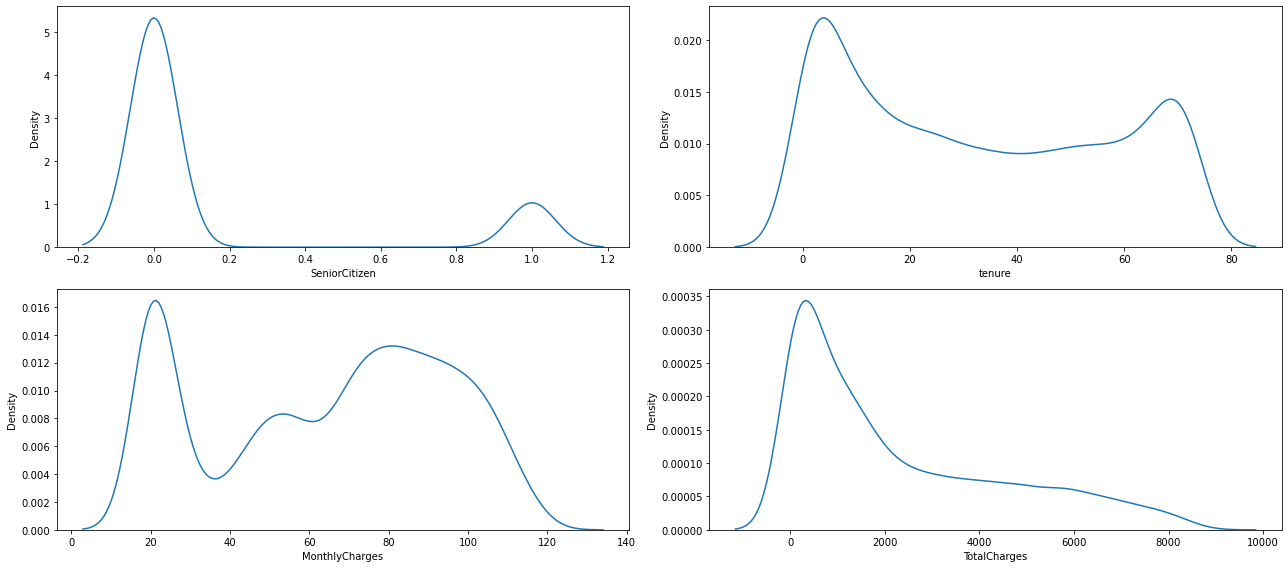

In [32]:

x = plt.figure(figsize=(18, 8))
for i, j in enumerate(X_train_num):
    x.add_subplot(2, 2, i+1)
    sns.kdeplot(df[j])
    x.tight_layout()
plt.tight_layout()

In [33]:
# Melihat nilai skewness pada X_train
X_train.skew()

SeniorCitizen     1.878221
tenure            0.251844
MonthlyCharges   -0.205961
TotalCharges      0.967697
dtype: float64

> Pada grafik terlihat bahwa,
- SeniorCitizen merupakan numerik yang isinya adalah data kategorik,
- tenure dan monthlycharge datanya terdistribusi normal
- Totalcharge memiliki data terdistribusi tidak normal atau skew


> Terlihat tidak ada outlier pada dataset, sehingga tidak dilakukan handling outlier

### Preprocessor

> Bagian ini adalah dimana Data dilakukan preprocessing menggunakan pipeline seperti scaling dan encoding sebelum data digunakan dalam model

In [34]:
# Preprocessor
numerical_norm_pipeline = Pipeline([
        ("stdscaler", StandardScaler())
])

numerical_skew_pipeline = Pipeline([
        ("MMscaler", MinMaxScaler())
])

categorical_onehot_pipeline = Pipeline([
        ("onehot", OneHotEncoder())
])

categorical_ord_pipeline = Pipeline([
        ("ordinal", OrdinalEncoder())
])
        
prepocessor = ColumnTransformer([
        ("numeric_norm", numerical_norm_pipeline, ['tenure', 'MonthlyCharges']),
        ("numeric_skew", numerical_skew_pipeline, ['TotalCharges']),
        ("categoric_hot", categorical_onehot_pipeline, ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
                                                        'StreamingMovies', 'Dependents', 'PhoneService', 'PaperlessBilling']),
        ("categoric_ord", categorical_ord_pipeline, ['Contract']),
        ("skip", "passthrough", ['SeniorCitizen'])
])

> Preprocessing data dilakukan dengan pertimbangan skewness data, 
- Standardscaler digunakan untuk data yang terdistribusi normal,
- MinMaxscaler digunakan untuk data yang terdistribusi tidak normal,
- onehotencoder digunakan untuk merubah data kategorik menjadi numerik
- ordinal encoder digunakan untuk merubah data kategorik menjadi numerik yang memiliki keterurutan
- passthrough untuk tidak memproses data karena sudah dalam bentuk numerik

> Perubahan label dari isi y_train dimana Yes, No, menjadi 1 dan 0 untuk memudahkan analisa

In [35]:
Change_label = {'Yes':1, 'No':0}

In [36]:
y_train = y_train.replace(Change_label)

In [37]:
y_val = y_val.replace(Change_label)

In [38]:
# Melakukan fit dan transform data
prepocessor.fit(X_train)
X_train_sc = prepocessor.transform(X_train)
X_test_sc = prepocessor.transform(X_test)
X_val_sc = prepocessor.transform(X_val)

### Tensorflow Pipeline

In [39]:
# Membuat Fungsi Tensorflow Pipeline
def get_batches(x, y, buffer_size, batch_size, shuffle=False):
        
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))
        
    if shuffle:
        shuffled_data = data_ds.shuffle(buffer_size)
        data_batches = shuffled_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        
    else: 
        data_batches = data_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        
    return data_batches

In [40]:
# Membuat Tensorflow Pipeline
training_batches = get_batches(X_train_sc, y_train, 100, 64, shuffle=True)
validation_batches = get_batches(X_val_sc, y_val, 100, 64, shuffle=False)
testing_batches = get_batches(X_test_sc, y_test, 100, 64, shuffle=False)

In [41]:
X_train_sc.shape, y_train.shape

((4500, 29), (4500,))

## 6 - Model Definition, Training and Evaluation

> Bagian ini merupakan proses pendefinisian model, dan pada dataset ini akan digunakan Sequential API base, Functional API base, Sequential API Optimization, dan Functional API Optimization karena target pada dataset ini adalah melihat apakah pelanggan kemungkinan akan churn atau tidak, sehingga akan dilihat performanya menggunakan metric classification report dan confusion matrix

### Sequential API Base

> Pada model Sequential base ini akan dilakukan input shape sebanyak 29 dimana mengikut jumlah fitur shape dari X_train, hidden layer dengan dense 15 dan ouput dense 1 karena data binary classification, dengan activation function proses menggunakan relu dan activation function output sigmoid


> Metric yang dicari adalah accuracy, dengan loss type yang digunakan binary_crossentropy, optimizer menggunakan adam dan epoch yang digunakan sebanyak 300

In [42]:
# sequential API
model_seq_base = Sequential()
model_seq_base.add(Dense(29, activation='relu', input_shape=(29,))) 

model_seq_base.add(Dense(15,activation='relu'))

model_seq_base.add(Dense(1, activation='sigmoid'))

# compile
model_seq_base.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# train
history = model_seq_base.fit(training_batches, epochs=300, validation_data=validation_batches)

Epoch 1/300
71/71 [==============================] - 3s 13ms/step - loss: 0.5053 - accuracy: 0.7687 - val_loss: 0.4441 - val_accuracy: 0.7895
Epoch 2/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4226 - accuracy: 0.7929 - val_loss: 0.4301 - val_accuracy: 0.7815
Epoch 3/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4156 - accuracy: 0.7976 - val_loss: 0.4273 - val_accuracy: 0.7913
Epoch 4/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.7996 - val_loss: 0.4260 - val_accuracy: 0.7904
Epoch 5/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8009 - val_loss: 0.4251 - val_accuracy: 0.7957
Epoch 6/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4101 - accuracy: 0.8011 - val_loss: 0.4246 - val_accuracy: 0.7957
Epoch 7/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4091 - accuracy: 0.8016 - val_loss: 0.4240 - val_accuracy: 0.7940
Epoch 8/300


In [43]:
model_seq_base_df = pd.DataFrame(model_seq_base.history.history)
model_seq_base_df

,loss,accuracy,val_loss,val_accuracy
0,0.505267,0.768667,0.444073,0.789520
1,0.422641,0.792889,0.430127,0.781528
2,0.415582,0.797556,0.427341,0.791297
3,0.413164,0.799556,0.426045,0.790409
4,0.411105,0.800889,0.425066,0.795737
...,...,...,...,...
295,0.344990,0.834222,0.486489,0.785080
296,0.344833,0.835778,0.487728,0.787744
297,0.344916,0.835111,0.487816,0.784192
298,0.345179,0.836000,0.487170,0.785968


<AxesSubplot:>

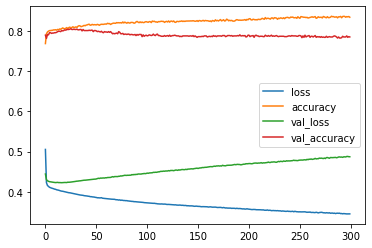

In [44]:
model_seq_base_df.plot()

> Terlihat plot dari hasil model masih belum baik, karena nilai loss semakin naik dan belum konvergen

In [45]:
model_seq_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                870       
                                                                 
 dense_1 (Dense)             (None, 15)                450       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,336
Trainable params: 1,336
Non-trainable params: 0
_________________________________________________________________


In [46]:
X_val_list = X_val_sc[:2]
X_val_list.tolist()

[[0.5222033538966214,
  -0.7294839460754009,
  0.21195076455416362,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [-0.5799507882063106,
  0.7060089156486282,
  0.17338913964627856,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0]]

#### Classification Report

In [47]:
# membuat model evaluasi 
y_pred = model_seq_base.predict(X_val_sc)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_val, y_pred))

36/36 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       820
           1       0.62      0.53      0.57       306

    accuracy                           0.79      1126
   macro avg       0.73      0.70      0.71      1126
weighted avg       0.78      0.79      0.78      1126



> Accuracy score yang didapat dari model Sequential API Base adalah sebesar 78%, dan nilai recall 87%  pada target tidak churn, dan 55% pada churn, nilai tersebut sangat berebeda atau overfitting, karena jumlah target dan fitur yang berbeda jauh atau bisa dinyatakan imbalance

#### Confusion Matrix

In [48]:
cm_seq_base = confusion_matrix(y_val, y_pred)

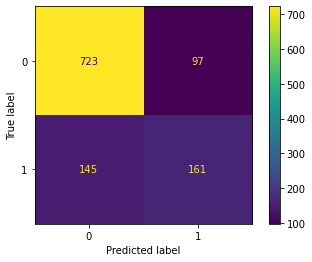

In [49]:
cm_display = ConfusionMatrixDisplay(cm_seq_base).plot()

> Pada matrix terlihat bahwa pelanggan yang kemungkinan tidak churn yang ternyata churn adalah 107 dari jumlah kemungkinan pelanggan churn 168

### Functional API Base

> Pada model Functional base ini akan dilakukan input shape sebanyak 29, hidden layer dengan dense 15 dan ouput dense 1 karena data binary classification, dengan activation function proses menggunakan relu dan activation function output sigmoid


> Metric yang dicari adalah accuracy, dengan loss type yang digunakan binary_crossentropy, optimizer menggunakan adam dan epoch yang digunakan sebanyak 300

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
input_ = keras.layers.Input(shape=X_train_sc.shape[1:])
hidden1 = keras.layers.Dense(29, activation="relu")(input_)
hidden2 = keras.layers.Dense(15, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation='sigmoid')(concat)
model_func_base = keras.models.Model(inputs=[input_], outputs=[output])

In [52]:
model_func_base.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model_func_base.fit(training_batches, epochs=300,
                    validation_data=validation_batches)


Epoch 1/300
71/71 [==============================] - 2s 8ms/step - loss: 0.5515 - accuracy: 0.7122 - val_loss: 0.4710 - val_accuracy: 0.7371
Epoch 2/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.7842 - val_loss: 0.4301 - val_accuracy: 0.7824
Epoch 3/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4170 - accuracy: 0.7969 - val_loss: 0.4250 - val_accuracy: 0.7957
Epoch 4/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.7967 - val_loss: 0.4236 - val_accuracy: 0.7975
Epoch 5/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4106 - accuracy: 0.7998 - val_loss: 0.4230 - val_accuracy: 0.8002
Epoch 6/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.8007 - val_loss: 0.4231 - val_accuracy: 0.7993
Epoch 7/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4083 - accuracy: 0.8031 - val_loss: 0.4225 - val_accuracy: 0.7984
Epoch 8/300
7

In [53]:
model_func_base_df = pd.DataFrame(model_func_base.history.history)
model_func_base_df

,loss,accuracy,val_loss,val_accuracy
0,0.551492,0.712222,0.470979,0.737123
1,0.435906,0.784222,0.430114,0.782416
2,0.417025,0.796889,0.425044,0.795737
3,0.413031,0.796667,0.423603,0.797513
4,0.410620,0.799778,0.422974,0.800178
...,...,...,...,...
295,0.348464,0.832667,0.465288,0.797513
296,0.347975,0.833556,0.467161,0.800178
297,0.347421,0.833556,0.466549,0.799290
298,0.347320,0.834222,0.465810,0.794849


<AxesSubplot:>

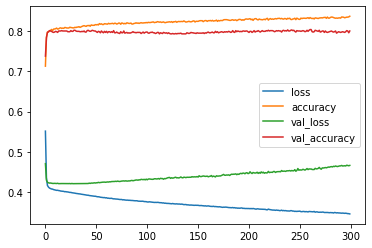

In [54]:
model_func_base_df.plot()

> Terlihat plot dari hasil model masih belum baik, karena nilai loss semakin naik dan belum konvergen

#### Classification Report

In [55]:
y_pred = model_func_base.predict(X_val_sc)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_val, y_pred))

36/36 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       820
           1       0.64      0.60      0.62       306

    accuracy                           0.80      1126
   macro avg       0.75      0.74      0.74      1126
weighted avg       0.80      0.80      0.80      1126



> Accuracy score yang didapat dari model Functional API Base adalah sebesar 79%, dan nilai recall 88%  pada target tidak churn, dan 57% pada churn, nilai tersebut sangat berebeda atau overfitting, karena jumlah target dan fitur yang berbeda jauh atau bisa dinyatakan imbalance

#### Confusion Matrix

In [56]:
cm_func_base = confusion_matrix(y_val, y_pred)

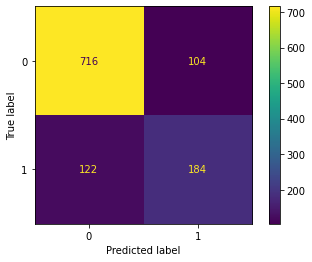

In [57]:
cm_display = ConfusionMatrixDisplay(cm_func_base).plot()

> Pada matrix terlihat bahwa pelanggan yang kemungkinan tidak churn yang ternyata churn adalah 102 dari jumlah kemungkinan pelanggan churn 175

### Sequential API Optimizer

> Pada model Sequential Optimization ini akan dilakukan input shape sebanyak 29, menambah hidden layer dengan dense 15 dan 5, dengan ouput dense 1 karena data binary classification, dengan activation function proses menggunakan relu dan activation function output sigmoid


> Metric yang dicari adalah accuracy, dengan loss type yang digunakan binary_crossentropy, optimizer dirubah dari adam ke SGD dan epoch yang digunakan sebanyak 300

In [58]:
# sequential API Optimizer
model_seq_opt = Sequential()
model_seq_opt.add(Dense(29, activation='relu', input_shape=(29,))) 
model_seq_opt.add(Dense(15,activation='relu'))
model_seq_opt.add(Dense(5,activation='relu'))
model_seq_opt.add(Dense(1, activation='sigmoid'))

# compile
model_seq_opt.compile(loss='binary_crossentropy',
              optimizer="SGD",
              metrics=['accuracy'])

# train
history = model_seq_opt.fit(training_batches, epochs=300, validation_data=validation_batches)

Epoch 1/300
71/71 [==============================] - 2s 10ms/step - loss: 0.5975 - accuracy: 0.7384 - val_loss: 0.5431 - val_accuracy: 0.7282
Epoch 2/300
71/71 [==============================] - 0s 5ms/step - loss: 0.5149 - accuracy: 0.7384 - val_loss: 0.4997 - val_accuracy: 0.7282
Epoch 3/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4862 - accuracy: 0.7384 - val_loss: 0.4801 - val_accuracy: 0.7282
Epoch 4/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4713 - accuracy: 0.7384 - val_loss: 0.4680 - val_accuracy: 0.7282
Epoch 5/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4620 - accuracy: 0.7384 - val_loss: 0.4601 - val_accuracy: 0.7282
Epoch 6/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4554 - accuracy: 0.7384 - val_loss: 0.4545 - val_accuracy: 0.7282
Epoch 7/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.7384 - val_loss: 0.4499 - val_accuracy: 0.7282
Epoch 8/300


In [59]:
model_seq_opt_df= pd.DataFrame(model_seq_opt.history.history)
model_seq_opt_df

,loss,accuracy,val_loss,val_accuracy
0,0.597521,0.738444,0.543128,0.728242
1,0.514933,0.738444,0.499740,0.728242
2,0.486157,0.738444,0.480059,0.728242
3,0.471298,0.738444,0.468024,0.728242
4,0.462013,0.738444,0.460129,0.728242
...,...,...,...,...
295,0.394569,0.816667,0.421902,0.801954
296,0.394300,0.816667,0.421614,0.801066
297,0.394190,0.816222,0.421324,0.801954
298,0.394400,0.817333,0.421624,0.800178


<AxesSubplot:>

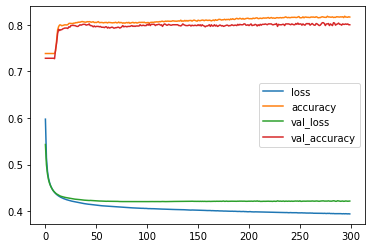

In [60]:
model_seq_opt_df.plot()

> Terlihat plot dari hasil model sudah baik, karena nilai loss dan accuracy tidak begitu berbeda atau naik, tidak ada explode atau vanish

#### Classification Report

In [61]:
y_pred = model_seq_opt.predict(X_val_sc)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_val, y_pred))

36/36 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       820
           1       0.66      0.55      0.60       306

    accuracy                           0.80      1126
   macro avg       0.75      0.72      0.73      1126
weighted avg       0.79      0.80      0.79      1126



> Accuracy score yang didapat dari model Sequential API Optimize adalah naik menjadi sebesar 80%, dan nilai recall naik menjadi 89%  pada target tidak churn, dan 56% pada churn, nilai tersebut sangat berebeda atau overfitting, karena jumlah target dan fitur yang berbeda jauh atau bisa dinyatakan imbalance

#### Confusion Matrix

In [62]:
cm_seq_opt = confusion_matrix(y_val, y_pred)

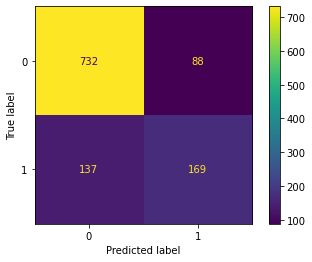

In [63]:
cm_display = ConfusionMatrixDisplay(cm_seq_opt).plot()

> Pada matrix terlihat bahwa pelanggan yang kemungkinan tidak churn yang ternyata churn adalah 88 dari jumlah kemungkinan pelanggan churn 171

### Functional API Optimizer

> Pada model Functional Optimization ini akan dilakukan input shape sebanyak 29, menambah hidden layer dengan dense 15 dan 5, dengan ouput dense 1 karena data binary classification, dengan activation function proses menggunakan relu dan activation function output sigmoid


> Metric yang dicari adalah accuracy, dengan loss type yang digunakan binary_crossentropy, optimizer dirubah dari adam ke SGD dan epoch yang digunakan sebanyak 300

In [64]:
input_ = keras.layers.Input(shape=X_train_sc.shape[1:])
hidden1 = keras.layers.Dense(29, activation="relu")(input_)
hidden2 = keras.layers.Dense(15, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(5, activation="relu")(hidden2)
concat = keras.layers.concatenate([input_, hidden2, hidden3])
output = keras.layers.Dense(1, activation='sigmoid')(concat)
model_func_opt = keras.models.Model(inputs=[input_], outputs=[output])

In [65]:
model_func_opt.compile(loss="binary_crossentropy", optimizer='sgd', metrics=['accuracy'])
history = model_func_opt.fit(training_batches, epochs=300,
                    validation_data=validation_batches)

Epoch 1/300
71/71 [==============================] - 2s 8ms/step - loss: 0.6329 - accuracy: 0.6302 - val_loss: 0.5552 - val_accuracy: 0.7096
Epoch 2/300
71/71 [==============================] - 0s 5ms/step - loss: 0.5263 - accuracy: 0.7260 - val_loss: 0.5023 - val_accuracy: 0.7380
Epoch 3/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4868 - accuracy: 0.7476 - val_loss: 0.4736 - val_accuracy: 0.7567
Epoch 4/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4635 - accuracy: 0.7731 - val_loss: 0.4557 - val_accuracy: 0.7860
Epoch 5/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4484 - accuracy: 0.7931 - val_loss: 0.4445 - val_accuracy: 0.7842
Epoch 6/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4385 - accuracy: 0.7971 - val_loss: 0.4372 - val_accuracy: 0.7877
Epoch 7/300
71/71 [==============================] - 0s 5ms/step - loss: 0.4318 - accuracy: 0.7989 - val_loss: 0.4328 - val_accuracy: 0.7957
Epoch 8/300
7

In [66]:
model_func_opt_df = pd.DataFrame(model_func_opt.history.history)
model_func_opt_df

,loss,accuracy,val_loss,val_accuracy
0,0.632920,0.630222,0.555217,0.709591
1,0.526298,0.726000,0.502277,0.738011
2,0.486824,0.747556,0.473613,0.756661
3,0.463485,0.773111,0.455702,0.785968
4,0.448399,0.793111,0.444478,0.784192
...,...,...,...,...
295,0.393597,0.815333,0.422633,0.793073
296,0.393520,0.817556,0.422599,0.793961
297,0.393534,0.817111,0.422603,0.791297
298,0.393497,0.818222,0.422671,0.793073


<AxesSubplot:>

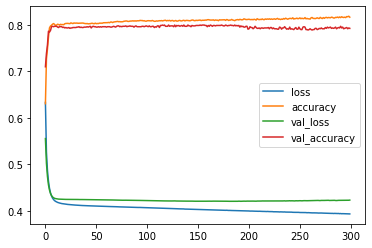

In [67]:
model_func_opt_df.plot()

> Terlihat plot dari hasil model sudah baik, karena nilai loss dan accuracy tidak begitu berbeda atau naik, tidak ada explode atau vanish

#### Classification Report

In [68]:
y_pred = model_func_opt.predict(X_val_sc)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_val, y_pred))

36/36 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       820
           1       0.65      0.52      0.58       306

    accuracy                           0.79      1126
   macro avg       0.74      0.71      0.72      1126
weighted avg       0.78      0.79      0.78      1126



> Accuracy score yang didapat dari model Functional API Optimize adalah sebesar 79%, dan nilai recall naik menjadi 89%  pada target tidak churn, dan 54% pada churn, nilai tersebut sangat berebeda atau overfitting, karena jumlah target dan fitur yang berbeda jauh atau bisa dinyatakan imbalance

#### Confusion Matrix

In [69]:
cm_func_opt = confusion_matrix(y_val, y_pred)

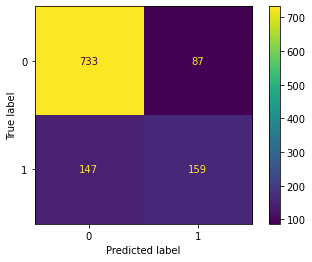

In [70]:
cm_display = ConfusionMatrixDisplay(cm_func_opt).plot()

> Pada matrix terlihat bahwa pelanggan yang kemungkinan tidak churn yang ternyata churn adalah 91 dari jumlah kemungkinan pelanggan churn 164

## 7 - Model Saving

### Save Preprocessor


In [71]:
# membuat directory pada folder
os.makedirs("frontend", exist_ok=True)

In [72]:
# save prepocessor
pickle.dump(prepocessor, open("frontend/preprocessor.pkl", "wb"))

In [73]:
# save pipeline
pickle.dump(numerical_norm_pipeline, open("frontend/numerical_norm_pipeline.pkl", "wb"))
pickle.dump(numerical_skew_pipeline, open("frontend/numerical_skew_pipeline.pkl", "wb"))
pickle.dump(categorical_onehot_pipeline, open("frontend/categorical_onehot_pipeline.pkl", "wb"))
pickle.dump(categorical_ord_pipeline, open("frontend/categorical_ord_pipeline.pkl", "wb"))

### Save Model

In [74]:
# Freeze Model
model_seq_opt.trainable = False

In [75]:
# save model
model_seq_opt.save("Telco_Churn")

INFO:tensorflow:Assets written to: Telco_Churn\assets


> model yang digunakan adalah dari Sequential API Optimize karena memiliki hasil yang paling baik dari segi recall dan accuracy

## 8 - Model Inference

> Bagian ini merupakan pembuatan model inferens atau melihat data baru berdasarkan model deep learning yang sudah dibuat

In [76]:
df_inf.reset_index(inplace=True)

In [77]:
df_inf.head(2)

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
1,1,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No


In [78]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling']


In [79]:
# Split between Numerical Columns and Categorical Columns

df_inf_num = df_inf[num_columns]
df_inf_cat = df_inf[cat_columns]

In [80]:
df_inf_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,24.80,24.80
1,0,41,25.25,996.45
2,0,52,19.35,1031.70
3,0,1,76.35,76.35
4,0,67,50.55,3260.10
5,1,68,89.60,6127.60
6,0,23,77.15,1759.40
7,0,72,72.10,5016.65
8,0,70,104.00,7250.15
9,0,1,19.40,19.40


In [81]:
df_inf_cat

,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,Contract,PaperlessBilling
0,No,No,No phone service,DSL,No,No,No,No,Month-to-month,Yes
1,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes
2,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Two year,No
3,No,Yes,No,Fiber optic,No,No,No,No,Month-to-month,No
4,No,Yes,No,DSL,No,No,Yes,No,Two year,No
5,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Month-to-month,Yes
6,Yes,Yes,Yes,DSL,Yes,No,Yes,No,Two year,Yes
7,Yes,Yes,Yes,DSL,Yes,Yes,Yes,No,Two year,No
8,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Two year,Yes
9,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,No


In [82]:
df_inf_scaled = prepocessor.transform(df_inf)
df_inf_scaled

array([[-1.27389969, -1.31166529,  0.00285556,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.35892126, -1.29669491,  0.11473494,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.80794702, -1.4929732 ,  0.11879375,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
  

In [83]:
y_pred_inf_seq_base = model_seq_base.predict(df_inf_scaled)
y_pred_inf_func_base = model_func_base.predict(df_inf_scaled)
y_pred_inf_seq_opt = model_seq_opt.predict(df_inf_scaled)
y_pred_inf_func_opt = model_func_opt.predict(df_inf_scaled)

1/1 [==============================] - 0s 44ms/step


In [84]:
print(y_pred_inf_seq_base)
print(y_pred_inf_func_base)
print(y_pred_inf_seq_opt)
print(y_pred_inf_func_opt)

[[0.48446542]
 [0.00625627]
 [0.00937874]
 [0.89044183]
 [0.00118568]
 [0.14714739]
 [0.01086816]
 [0.01925062]
 [0.1110597 ]
 [0.23640706]]
[[6.8213981e-01]
 [3.9122749e-02]
 [8.7162331e-03]
 [8.3986491e-01]
 [8.4354924e-06]
 [4.3762911e-02]
 [4.4623986e-03]
 [7.1677042e-04]
 [1.2184443e-01]
 [2.4934311e-01]]
[[0.66834396]
 [0.07315833]
 [0.00472781]
 [0.68805856]
 [0.01016866]
 [0.37982425]
 [0.01687234]
 [0.00673476]
 [0.0690962 ]
 [0.22529538]]
[[0.67868644]
 [0.06076125]
 [0.00543448]
 [0.7242573 ]
 [0.00742474]
 [0.3806161 ]
 [0.03285767]
 [0.00574805]
 [0.06610713]
 [0.25531474]]


In [85]:
# merubah nilai menjadi string Yes dan No, agar lebih mudah memaknai hasil prediksi
Seq_base_Churn = []

for items in y_pred_inf_seq_base:
    if items > 0.5:
        items = 'Yes'
        Seq_base_Churn.append(items)
    else:
        items = 'No'
        Seq_base_Churn.append(items)
Seq_base_Churn

['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No']

In [86]:
# merubah nilai menjadi string Yes dan No, agar lebih mudah memaknai hasil prediksi
Func_base_Churn = []

for items in y_pred_inf_func_base:
    if items > 0.5:
        items = 'Yes'
        Func_base_Churn.append(items)
    else:
        items = 'No'
        Func_base_Churn.append(items)
Func_base_Churn

['Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No']

In [87]:
# merubah nilai menjadi string Yes dan No, agar lebih mudah memaknai hasil prediksi
Seq_Opt_Churn = []

for items in y_pred_inf_seq_opt:
    if items > 0.5:
        items = 'Yes'
        Seq_Opt_Churn.append(items)
    else:
        items = 'No'
        Seq_Opt_Churn.append(items)
Seq_Opt_Churn

['Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No']

In [88]:
# merubah nilai menjadi string Yes dan No, agar lebih mudah memaknai hasil prediksi
Func_Opt_Churn = []

for items in y_pred_inf_func_opt:
    if items > 0.5:
        items = 'Yes'
        Func_Opt_Churn.append(items)
    else:
        items = 'No'
        Func_Opt_Churn.append(items)
Func_Opt_Churn

['Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No']

In [89]:
# membuat dataframe hasil inference
Seq_base_y_pred_inf_df = pd.DataFrame(Seq_base_Churn, columns=['Seq_base_Churn - Prediction'])
Func_base_y_pred_inf_df = pd.DataFrame(Func_base_Churn, columns=['Func_base_Churn - Prediction'])
Seq_opt_y_pred_inf_df = pd.DataFrame(Seq_Opt_Churn, columns=['Seq_Opt_Churn - Prediction'])
Func_opt_y_pred_inf_df = pd.DataFrame(Func_Opt_Churn, columns=['Func_Opt_Churn - Prediction'])

In [90]:
# Concate antara Inference-Set dan hasil Prediction

pd.concat([df_inf, Seq_base_y_pred_inf_df, Func_base_y_pred_inf_df, Seq_opt_y_pred_inf_df, Func_opt_y_pred_inf_df], axis=1)

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Seq_base_Churn - Prediction,Func_base_Churn - Prediction,Seq_Opt_Churn - Prediction,Func_Opt_Churn - Prediction
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,24.80,24.80,Yes,No,Yes,Yes,Yes
1,1,Male,0,No,No,41,Yes,Yes,No,No internet service,...,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No,No,No,No,No
2,2,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,Two year,No,Mailed check,19.35,1031.70,No,No,No,No,No
3,3,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Month-to-month,No,Electronic check,76.35,76.35,Yes,Yes,Yes,Yes,Yes
4,4,Male,0,No,No,67,Yes,No,DSL,No,...,Two year,No,Bank transfer (automatic),50.55,3260.10,No,No,No,No,No
5,5,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.60,Yes,No,No,No,No
6,6,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Two year,Yes,Bank transfer (automatic),77.15,1759.40,No,No,No,No,No
7,7,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Two year,No,Credit card (automatic),72.10,5016.65,No,No,No,No,No
8,8,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Two year,Yes,Credit card (automatic),104.00,7250.15,Yes,No,No,No,No
9,9,Male,0,No,No,1,Yes,No,No,No internet service,...,Month-to-month,No,Mailed check,19.40,19.40,Yes,No,No,No,No


> Terlihat dari empat model hasil inference semuanya sama, dan memiliki 3 miss prediction sesuai dengan accuracynya yang sekitar 80%

## 9 - Conclusions, Assumptions and Overall Analysis

Telah dilakukan analisa dan pemodelan Deep Learning dengan 4 model yaitu Sequential API base, Functional API base, Sequential API Optimize, dan Fuctional API Optimize,
dengan menggunakan dataset Telco_Customer_Churn dengan detail sebagai berikut:
- Persiapan data yang kemudian digunakan dalam 4 Pemodelan, memasukan data, mencangkup EDA analysis, splitting dataset menjadi train, validation dan test, kemudian melakukan seleksi fitur, handling missing value, dan pengecekan outlier, kemudian dilakukan preprocessing menggunakan pipeline, scaling dan encoding sudah dilakukan sesuai dengan distribusi data dan nilai skewnessnya, MinMaxscaler untuk yang terdistribusi tidak normal dan StandardScaler untuk yang terdistribusi normal, dan dilakukan juga OneHotencoding untuk data kategorikal dan Ordinal Encoding pada Contract karena diasumsikan sebagai keterurutan, kemudian dilakukan Tensorflow Pipeline dan mendapatkan batches yang kemudian dimasukan kedalam model
- Implementasi 4 model untuk mencari yang terbaik, membuat prediksi, melakukan training pada model, model evaluasi dengan mendapatkan hasil accuracy dan recall dan model terbaik adalah Sequential API Optimize dengan nilai accuracy: 80% yang sebelumnya 78%, nilai recall 89% untuk target yang tidak churn dan 56% untuk target churn, melakukan model inferens dan mendapat data prediksi Telco_Customer_Churn
- Disclaimer: mungkin data akan berubah-ubah setelah dilakukan Re-Run pada model, oleh karenanya narasi dari Classification Report dan Confusion Matrix bisa berbeda, namun seharusnya hasilnya tidak akan berbeda jauh dari yang sudah dinarasikan


Terimakasih


Source : 

https://colab.research.google.com/github/ardhiraka/FSDS_Guidelines/blob/master/p2/w1/d1pm.ipynb#scrollTo=hEUi__5aRm3C

https://www.kaggle.com/code/naseralqaydeh/tensorflow-input-pipeline-tf-data/notebook

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113